In [1]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import pylab
import os
import glob
import statsmodels.api as sm

#path = os.getcwd() 
path = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals"

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
files = glob.glob(path + "/*.csv")
frame = pd.DataFrame()

list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

print "DONE CONCATINATING DATA"

DONE CONCATINATING DATA


In [5]:
path15 = "/Users/Dani/Dropbox/Muni_Finance_Lab/Raw_Data/Appeals/appeals15.csv"

In [6]:
df15 = df = pd.read_csv(path15,index_col=None, header=0)

In [8]:
df15['win'].value_counts()

1    300665
0     69518
dtype: int64

In [10]:
df15.total_rev.sum()

5454334012

In [11]:
df15 = df15[df15["proppose_av"] != 0]

In [3]:
### filter ONLY for % revision
df = df[df["proppose_av"] != 0]

In [50]:
df.columns

Index([u'Unnamed: 0', u'pin', u'taxyear', u'appealnum', u'attorneytaxrep',
       u'prioir_av', u'proppose_av', u'assr_final', u'board_av', u'housenum',
       u'dir', u'street_name', u'street_suffix', u'city_name', u'zip', u'area',
       u'subarea', u'ass_win', u'bor_win', u'bor_rev', u'assr_rev',
       u'total_rev', u'classification', u'win', u'clean_name', u'%_rev',
       u'class_type'],
      dtype='object')

In [12]:
## Creating dfs
df15["%_rev"] = df15["total_rev"] / df15["proppose_av"]
df15["class_type"] = df15["classification"].apply(lambda x: str(x)[0])

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
df15_2 = df15[(df15["class_type"] == "2")]
df15_5 = df15[(df15["class_type"] == "5")]

In [19]:
df15_5.shape

(47410, 27)

In [22]:
print df15_2["total_rev"].describe()
print df15_5["total_rev"].describe()

count      301061.000000
mean         3288.750997
std         28305.298202
min        -66106.000000
25%           331.000000
50%          1513.000000
75%          3623.000000
max      13197047.000000
Name: total_rev, dtype: float64
count       47410.000000
mean        81264.603586
std        617639.458954
min      -7287064.000000
25%           118.000000
50%          7327.500000
75%         31849.500000
max      38627854.000000
Name: total_rev, dtype: float64


In [23]:
print df15_2["%_rev"].describe()
print df15_5["%_rev"].describe()

count    301061.000000
mean          0.108362
std           0.102287
min          -1.624785
25%           0.047268
50%           0.099887
75%           0.146474
max           1.000000
Name: %_rev, dtype: float64
count    47410.000000
mean         0.200821
std          0.225259
min        -19.551412
25%          0.010904
50%          0.160312
75%          0.312473
max          0.999992
Name: %_rev, dtype: float64


In [24]:
print df15_2["win"].value_counts()
print df15_5["win"].value_counts()

1    250147
0     50914
dtype: int64
1    36882
0    10528
dtype: int64


In [38]:
## condos
print df15_2[df15_2['classification'] == 299].shape
print df15_2[df15_2['classification'] != 299].shape

(230464, 27)
(70597, 27)


In [43]:
## condos
print df15_2[df15_2['classification'] == 299]['win'].value_counts()
print df15_2[df15_2['classification'] != 299]['win'].value_counts()

1    197887
0     32577
dtype: int64
1    52260
0    18337
dtype: int64


In [7]:
## Creating dfs
df["%_rev"] = df["total_rev"] / df["proppose_av"]
df15 = pd.read_csv(path + "/appeals15.csv",index_col=None, header=0)
df["class_type"] = df["classification"].apply(lambda x: str(x)[0])
df_2_5 = df[(df["class_type"] == "2") | (df["class_type"] == "5")]
df_2 = df[(df["class_type"] == "2")]
df_5 = df[(df["class_type"] == "5")]

In [5]:
def clean(name, remove_spaces=True):
    '''
    Given a name string, return a clean name 
    that is lowercase and only alphabetic characters.

    If remove_spaces,
        returns "starbuckscoffeeco"
    if remove_spaces is False
        return "starbucks coffee co"
    '''

    lower = name.lower()
    if not remove_spaces:
        p = re.sub(r'\(([^\)]+)\)', '', lower)
        return re.sub(r'[^a-z ]', '', p).strip()

    else:
        p = re.sub(r'\(([^\)]+)\)', '', lower)
        return re.sub(r'[^a-z]', '', lower)


In [6]:
df15["attorneytaxrep"].str.replace("\.|\s", "")
#.str.replace(".", "").replace(" ", "")
1

1

In [7]:
def print_statistics(data):
    '''
    Given a pandas dataframe, print dataframe statistics, correlation, and missing data.
    '''
    pd.set_option('display.width', 20)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    print '**** column names:  ', "\n", data.columns.values
    #print '**** top of the data: ', "\n",  data.head()
    #print '**** dataframe shape: ', "\n", data.shape
    print '**** statistics: ', "\n", data.describe(include='all')
    #print '**** MODE: ', "\n", data.mode()
    print '**** sum of null values by column: ', "\n", data.isnull().sum()
    print '**** correlation matrix: ', "\n", data.corr()

print_statistics(df)

**** column names:   
['Unnamed: 0' 'pin' 'taxyear' 'appealnum' 'attorneytaxrep' 'prioir_av'
 'proppose_av' 'assr_final' 'board_av' 'housenum' 'dir' 'street_name'
 'street_suffix' 'city_name' 'zip' 'area' 'subarea' 'ass_win' 'bor_win'
 'bor_rev' 'assr_rev' 'total_rev' 'classification' 'win' 'clean_name'
 '%_rev' 'class_type']
**** statistics:  
        Unnamed: 0  \
count  2607270.000   
unique         nan   
top            nan   
freq           nan   
mean    118534.188   
std      84815.794   
min          0.000   
25%      50155.000   
50%     103127.000   
75%     169259.000   
max     370182.000   

                      pin  \
count         2607270.000   
unique                nan   
top                   nan   
freq                  nan   
mean   14503313178328.814   
std     6206494268886.733   
min     1011000020000.000   
25%    11191030321001.250   
50%    14334230481081.000   
75%    17161070371149.000   
max    33323020140000.000   

           taxyear  \
count  2607270.00

In [8]:
#df[(pd.notnull(df['%_rev'])) | (df["proppose_av"] != 0)].describe()
df["%_rev"].describe()

count    2607270.000
mean          -8.487
std         6491.493
min     -6889454.500
25%            0.000
50%            0.082
75%            0.178
max            1.000
Name: %_rev, dtype: float64

#### Appeals per year

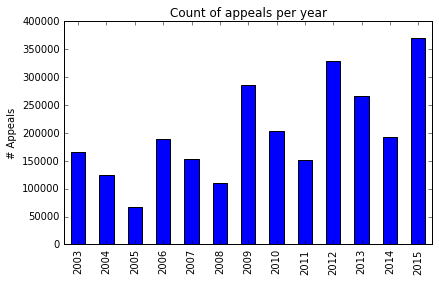

In [9]:
ax = pd.value_counts(df["taxyear"], sort=False).plot(kind = "bar", title = "Count of appeals per year")
plt.tight_layout()
ax.set_ylabel("# Appeals")
plt.savefig(os.getcwd()  + "/results/appeals-per-year.png")

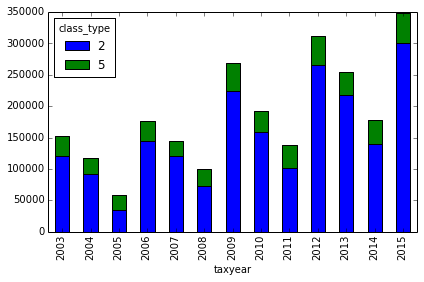

In [103]:
df_2_5.groupby(['taxyear','class_type']).size().unstack().plot(kind = "bar", stacked=True)
plt.tight_layout()
plt.savefig(os.getcwd() + "/results/appeals-class2-5.png")

In [ ]:
# condos = 299
# create new variable of condo, not condo
df_2["condo"] = np.where(df_2['classification'] == 299, 1, 0)


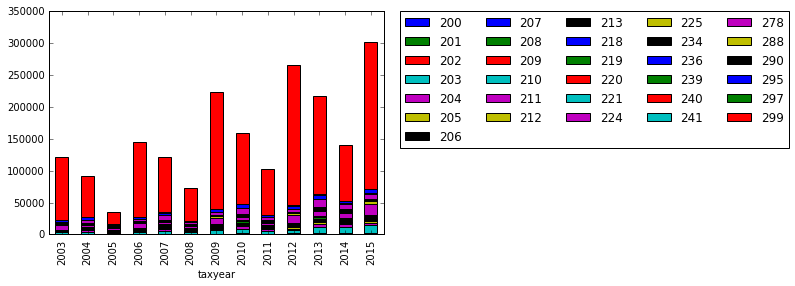

In [39]:

df_2.groupby(['taxyear','classification']).size().unstack().plot(kind = "bar", stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 5)
#plt.tight_layout()
plt.savefig(os.getcwd() + "/results/appeals-condo.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



In [49]:
df_2.groupby(['taxyear','condo']).size().groupby(level=0).apply(lambda x: 100*x/float(x.sum())).unstack()

condo,0,1
taxyear,,
2003,18.356795,81.643205
2004,29.475543,70.524457
2005,45.626498,54.373502
2006,18.921554,81.078446
2007,28.670882,71.329118
2008,29.648138,70.351862
2009,18.106016,81.893984
2010,29.598220,70.401780
2011,29.385479,70.614521


### Top 20 attorneys / firms by all appeals

In [33]:
pd.value_counts(df["attorneytaxrep"])[:20]
1

1

### Top attorneys for 2015

In [35]:
pd.value_counts(df15["attorneytaxrep"])[:20]
1

1

### 2015 total revision by win / lose of appeal

In [204]:
df15[df15["win"] == 0]["total_rev"].mean()

0.0

In [106]:
print df15[df15["win"] == 0]["total_rev"].describe()

print "win"
print df15[df15["win"] == 1]["total_rev"].describe()


count    69518
mean         0
std          0
min          0
25%          0
50%          0
75%          0
max          0
Name: total_rev, dtype: float64
win
count      300665.000000
mean        18140.901043
std        253224.580296
min      -7287064.000000
25%           817.000000
50%          2476.000000
75%          5423.000000
max      38627854.000000
Name: total_rev, dtype: float64


1

In [108]:
# plt.hist(df15[df15["win"] == 1]["total_rev"])
#plt.savefig(path + "/results/distribution1_total_rev_year.png")


In [109]:

#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 200000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 200000])
#plt.savefig(path + "/results/distribution2_total_rev_year.png")


In [110]:

#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 100000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 100000])
#plt.savefig(path + "/results/distribution3_total_rev_year.png")


In [111]:
#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 30000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 30000])
#plt.savefig(path + "/results/distribution4_total_rev_year.png")

In [29]:
#n, bins, patche = plt.hist(df15[(df15["total_rev"] < 10000) & (df15["win"] == 1)]["total_rev"], 10, range=[-1000, 10000])
#plt.savefig(path + "/results/distribution5_total_rev_year.png")
1

1

In [31]:
df15[["prioir_av","proppose_av", "assr_final", "board_av", "win", "assr_rev", "total_rev"]]
1

1

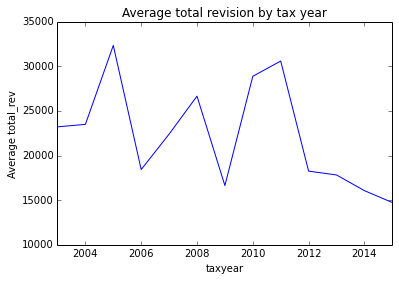

In [163]:
ax = df.groupby(['taxyear']).mean()['total_rev'].plot(title="Average total revision by tax year")
ax.set_ylabel("Average total_rev")
plt.savefig(path + "/results/avg_total_rev_year.png")

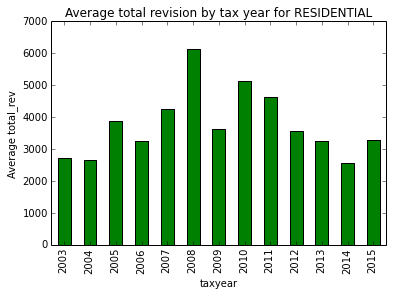

In [46]:
## total revision for residential only
ax = df_2.groupby(['taxyear']).mean()['total_rev'].plot(title="Average total revision by tax year for RESIDENTIAL", kind= "bar", color = "green")
ax.set_ylabel("Average total_rev")
#plt.savefig(os.getcwd() + "/results/avg_total_rev_year_RESIDENTIAL.png")


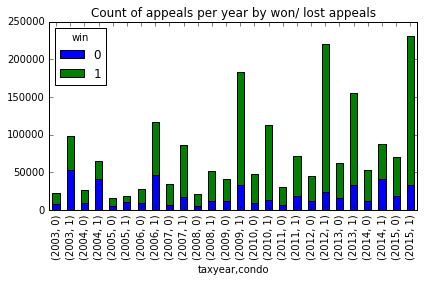

In [51]:
ax = df_2.groupby(['taxyear','win']).size().unstack().plot(kind = "bar", stacked=True, title="Count of appeals per year by won/ lost appeals")

plt.tight_layout()
plt.savefig(os.getcwd() + "/results/appeals-count-win.png")

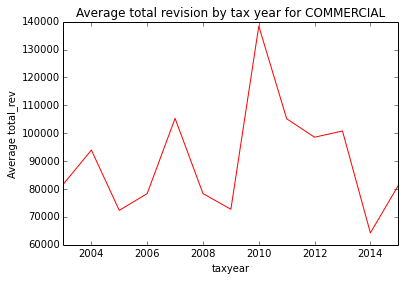

In [45]:
## total revision for commercial only
ax = df_5.garoupby(['taxyear']).mean()['total_rev'].plot(title="Average total revision by tax year for COMMERCIAL", color = "red")
ax.set_ylabel("Average total_rev")
plt.savefig(os.getcwd() + "/results/avg_total_rev_year_COMM.png")


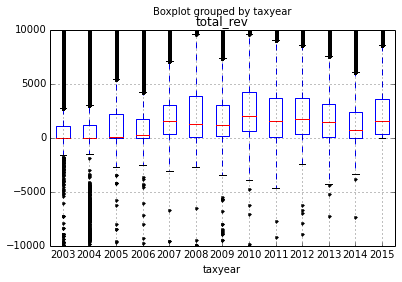

In [132]:
### boxplot for each year for residential of total_rev

ax = df_2.boxplot(column="total_rev", by="taxyear", sym="k.")


ax.set_ylim([-10000, 10000])
plt.savefig(os.getcwd() + "/results/boxplot_revision3.png")

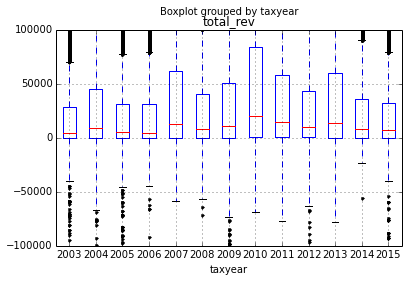

In [138]:
### boxplot for each year for commercial of total_rev

ax = df_5.boxplot(column="total_rev", by="taxyear", sym="k.")


ax.set_ylim([-100000, 100000])
plt.savefig(os.getcwd() + "/results/COMboxplot_revision2.png")

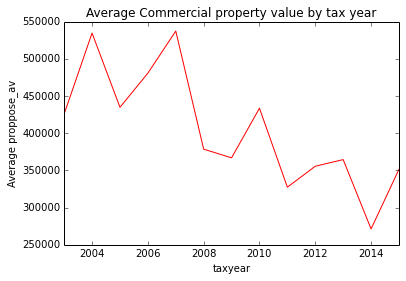

In [144]:
## total revision / proppose_av
ax = df_5.groupby(['taxyear']).mean()['proppose_av'].plot(title="Average Commercial property value by tax year", color="red")
ax.set_ylabel("Average proppose_av")
plt.savefig(os.getcwd() + "/results/avg_commercial_value.png")

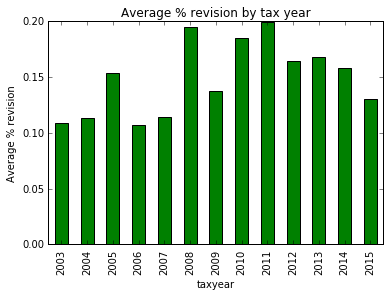

In [14]:
## total revision / proppose_av

ax = df_2[df_2["win"] == 1].groupby(['taxyear']).mean()['%_rev'].plot(title="Average % revision by tax year", color="green",kind="bar")
ax.set_ylabel("Average % revision")
#ax.set_ylim([-1, 1])
plt.savefig(os.getcwd() + "/results/avg_residential_%rev_WON.png")

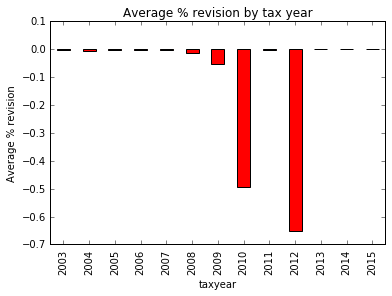

In [15]:
ax = df_2[df_2["win"] == 0].groupby(['taxyear']).mean()['%_rev'].plot(title="Average % revision by tax year", color="red",kind="bar")
ax.set_ylabel("Average % revision")
plt.savefig(os.getcwd() + "/results/avg_residential_%rev_LOST.png")

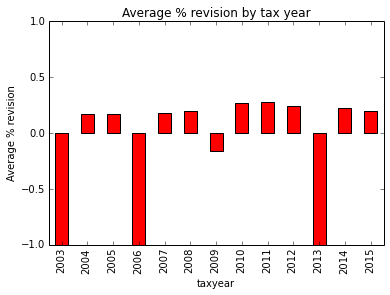

In [25]:
ax = df_5.groupby(['taxyear']).mean()['%_rev'].plot(title="Average % revision by tax year", color="red", kind="bar")
ax.set_ylabel("Average % revision")
ax.set_ylim([-1, 1])
plt.savefig(os.getcwd() + "/results/avg_commercial2_%rev.png")

In [22]:
df_5[df_5["%_rev"] < - 100][['taxyear', "prioir_av", "proppose_av", "board_av", "total_rev", "%_rev"]]
#[['total_rev', 'proppose_av', "%_rev"]]

,taxyear,prioir_av,proppose_av,board_av,total_rev,%_rev
148640,2003,127683,2,132999,-132997,-66498.500000
137082,2006,682768,1,1586558,-1586557,-1586557.000000
33436,2009,8288531,405,7010581,-7010176,-17309.076543
154868,2010,221,279,30721,-30442,-109.111111
152804,2013,12,12,5407,-5395,-449.583333
195335,2013,0,2,4798095,-4798093,-2399046.500000
195336,2013,0,2,1539752,-1539750,-769875.000000
195337,2013,0,2,1295580,-1295578,-647789.000000
195338,2013,0,2,13328066,-13328064,-6664032.000000
195339,2013,0,2,5864339,-5864337,-2932168.500000


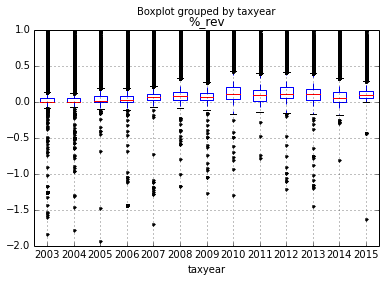

In [42]:
### boxplot for each year for commercial of total_rev
ax = df_2.boxplot(column="%_rev", by="taxyear", sym="k.")


ax.set_ylim([-2, 1])
plt.savefig(os.getcwd() + "/results/RESboxplot_%_revision.png")

In [54]:
# condos
pd.crosstab([df_2.taxyear, df_2.condo], df_2.win,  margins=True)

win                 0        1      All
taxyear condo                          
2003    0        8186    13969    22155
        1       52900    45636    98536
2004    0        8724    18489    27213
        1       40543    24568    65111
2005    0        5988     9812    15800
        1       11181     7648    18829
2006    0        9171    18196    27367
        1       45855    71412   117267
2007    0        6354    28240    34594
        1       16870    69195    86065
2008    0        4966    16689    21655
        1       11963    39422    51385
2009    0       12274    28267    40541
        1       33124   150244   183368
2010    0        9369    37852    47221
        1       13823    98496   112319
2011    0        6987    23000    29987
        1       18391    53669    72060
2012    0       12618    32811    45429
        1       23342   197301   220643
2013    0       16478    46244    62722
        1       32783   122235   155018
2014    0       12550    40183    52733
        1       41004    46649    87653
2015    0       18337    52260    70597
        1       32577   197887   230464
All            506358  1490374  1996732

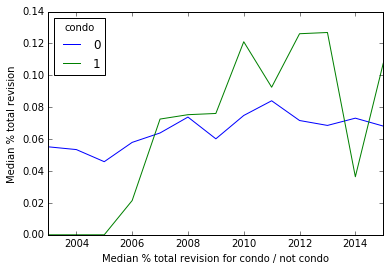

In [81]:
## total revision condo

ax = df_2.groupby(['taxyear','condo']).median()['%_rev'].unstack().plot()
ax.set_xlabel("Median % total revision for condo / not condo")
ax.set_ylabel("Median % total revision")
plt.savefig(os.getcwd() + "/results/condo_median_%_rev.png")

## total revision NOT condo

In [67]:
1

1